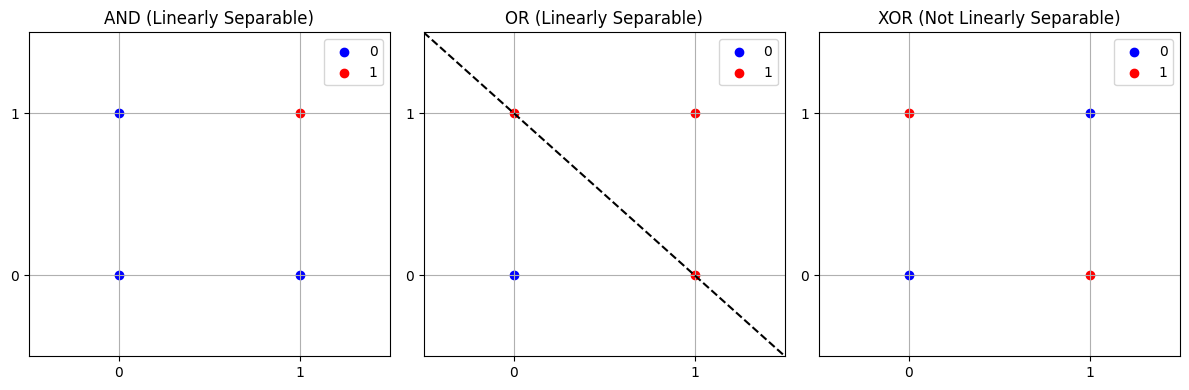

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input points
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    return int(tmp > 0)


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    return int(tmp > 0)


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    return int(tmp > 0)


def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)


# Labels
labels_and = np.array([AND(x[0], x[1]) for x in X])
labels_or = np.array([OR(x[0], x[1]) for x in X])
labels_xor = np.array([XOR(x[0], x[1]) for x in X])


# Plotting function
def plot_gate(X, labels, title, ax, boundary_line=None):
    for x, label in zip(X, labels):
        color = "red" if label == 1 else "blue"
        ax.scatter(
            x[0],
            x[1],
            color=color,
            label=(
                str(label)
                if str(label) not in ax.get_legend_handles_labels()[1]
                else ""
            ),
        )
    ax.set_title(title)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.grid(True)
    ax.legend()
    if boundary_line is not None:
        x_vals = np.linspace(-0.5, 1.5, 100)
        y_vals = boundary_line(x_vals)
        ax.plot(x_vals, y_vals, "k--")


# Decision boundaries
def and_line(x):
    return (1.5 - 0.5 * x) / 0.5


def or_line(x):
    return (0.5 - 0.5 * x) / 0.5


# --- 保存対象1：XORが線形分離できない例 ---
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_gate(X, labels_and, "AND (Linearly Separable)", axes[0], and_line)
plot_gate(X, labels_or, "OR (Linearly Separable)", axes[1], or_line)
plot_gate(X, labels_xor, "XOR (Not Linearly Separable)", axes[2], None)
plt.tight_layout()
plt.savefig("xor_graph.png")  # 保存
plt.close()

# --- 保存対象2：XORの構造図（NAND + OR → AND） ---
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis("off")
ax.text(0.1, 0.8, "x1", fontsize=14)
ax.text(0.1, 0.4, "x2", fontsize=14)
ax.text(0.4, 0.8, "NAND", fontsize=14, bbox=dict(boxstyle="round", fc="w"))
ax.text(0.4, 0.4, "OR", fontsize=14, bbox=dict(boxstyle="round", fc="w"))
ax.text(0.7, 0.6, "AND", fontsize=14, bbox=dict(boxstyle="round", fc="w"))
ax.text(0.95, 0.6, "y", fontsize=14)

# 線
ax.annotate("", xy=(0.4, 0.75), xytext=(0.15, 0.8), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.4, 0.45), xytext=(0.15, 0.4), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.7, 0.6), xytext=(0.45, 0.8), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.7, 0.6), xytext=(0.45, 0.4), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.95, 0.6), xytext=(0.75, 0.6), arrowprops=dict(arrowstyle="->"))

plt.tight_layout()
plt.savefig("xor_diagram.png")  # 保存
plt.close()